<a href="https://colab.research.google.com/github/motorlearner/neuromatch/blob/main/orientationtask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider a generatitve model

$$
c ⟶ s ⟶ x
$$

where the cateogory $c$ determines the prior $p(s \mid c)$ and the measurement distribution $p(x \mid s)$.

For simplicity, we can for now work with Normal distributions, such that

$$
\begin{align*}
p(s \mid c) &= \mathrm{N}(\mu, \kappa_c^2) \\[1ex]
p(x \mid s) &= \mathrm{N}(s, \sigma^2)
\end{align*}
$$

where $\mu$ is the fixed mean, $\kappa_c^2$ is the class-conditioned prior variance, and $\sigma^2$ is the measurement variance (for now, assumed to be constant).

The observer makes a response based on the posterior distribution

$$
\begin{align*}
p(s \mid x)
&\propto p(x \mid s) p(s) \\[.5ex]
&= p(x \mid s) \sum_c p(s \mid c) p(c)
\end{align*}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import ipywidgets as widgets

In [ ]:
def xsd_func(l:float, u:float):
  """
  Create a function that computes measurement noise given stimulus orientation.

  Args:
      l: minimal sensory noise (will be at 90, 180, 270, 360deg)
      u: maximal sensory noise (will be at 45, 135, 225, 315deg)

  Returns:
      Function that maps stimulus orientation (in deg) to measurement noise.
  """
  # checks
  if u < l:
    raise ValueError(f"Expected u >= l, but got u={u}, l={l}.")
  # compute
  func = lambda s: l + np.abs(np.sin(np.radians(2*s))) * (u-l)
  return func

In [ ]:
def mod_simple(smean, ssd, s, xsdl, xsdu, n=2000):
  # support
  sup = np.linspace(-180, 180, 2000)
  # measurement noise function
  xsd = xsd_func(xsdl, xsdu)
  # distributions (prior, measurement dist)
  prior = stats.norm(smean, ssd)
  mdist = stats.norm(s, xsd(s))
  # simulated measurements
  x_arr = mdist.rvs(n)
  # functions
  pdf_prior = stats.norm(smean, ssd).pdf(sup)
  lik_funcs = [ stats.norm(sup, xsd(sup)).pdf(x) for x in x_arr ]
  pdf_post  = [ pdf_prior * lik for lik in lik_funcs ]
  # renormalize
  pdf_post = [ x / np.sum(x) for x in pdf_post ]
  # compute mode
  pm = [ sup[np.argmax(post)] for post in pdf_post ]
  # plot
  fig, ax = plt.subplots()
  ax.hist(pm, bins=50, density=True)
  ax.set_xlim((-180,180))

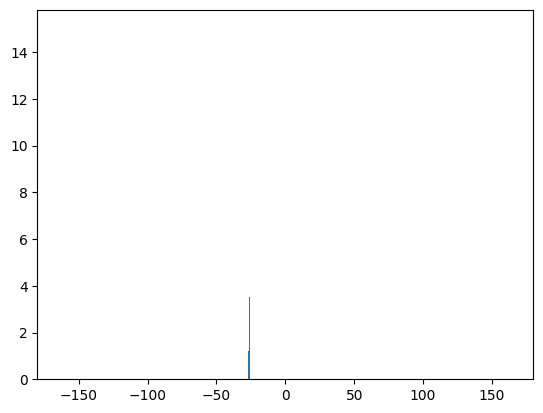

In [ ]:
mod_simple(0, 10, -90, 1, 30, n=5000)

